In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
#define the vertical filter
vertical_filter = [[-1,-2,-1], [0,0,0], [1,2,1]]

#define the horizontal filter
horizontal_filter = [[-1,0,1], [-2,0,2], [-1,0,1]]

In [3]:
#read in the invoice image
img = plt.imread('invoice1.jpg')

#get the dimensions of the image
n,m,d = img.shape

#initialize the edges image
edges_img = img.copy()

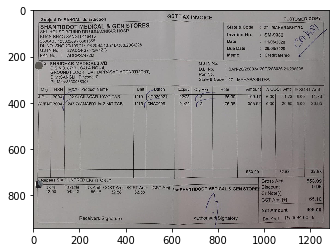

In [5]:
plt.imshow(img)

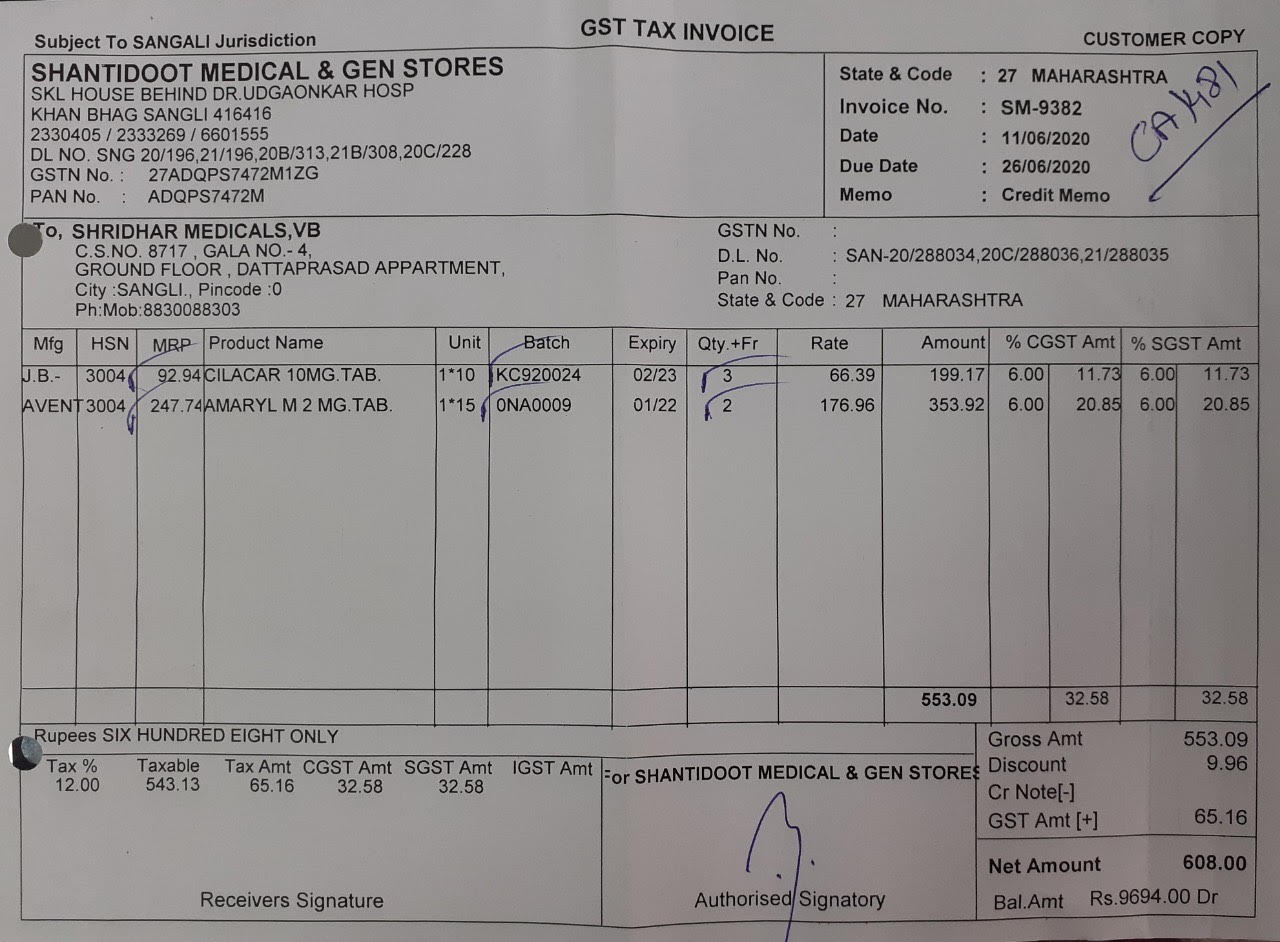

In [6]:
#read the image
im = Image.open("invoice1.jpg",'r')

#show image
im

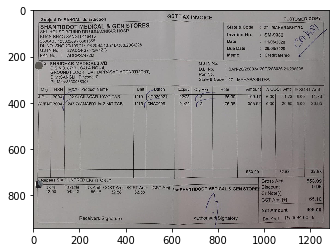

In [7]:
plt.imshow(im)

In [9]:
#loop over all pixels in the image
for row in range(3, n-2):
    for col in range(3, m-2):
        
        #create little local 3x3 box
        local_pixels = img[row-1:row+2, col-1:col+2, 0]
        
        #apply the vertical filter
        vertical_transformed_pixels = vertical_filter*local_pixels
        #remap the vertical score
        vertical_score = vertical_transformed_pixels.sum()/4
        
        #apply the horizontal filter
        horizontal_transformed_pixels = horizontal_filter*local_pixels
        #remap the horizontal score
        horizontal_score = horizontal_transformed_pixels.sum()/4
        
        #combine the horizontal and vertical scores into a total edge score
        edge_score = (vertical_score**2 + horizontal_score**2)**.5
        
        #insert this edge score into the edges image
        edges_img[row, col] = [edge_score]*3

#remap the values in the 0-1 range in case they went out of bounds
edges_img = edges_img/edges_img.max()

In [10]:
type(edges_img)

numpy.ndarray

In [11]:
edges_img.shape

(942, 1280, 3)

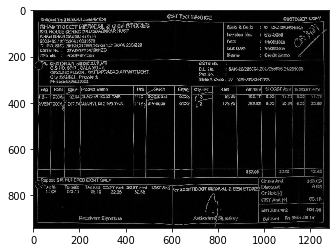

In [14]:
plt.imshow(edges_img)

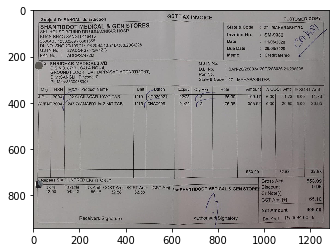

In [15]:
plt.imshow(img)

## Let's try convertin image to grayscale

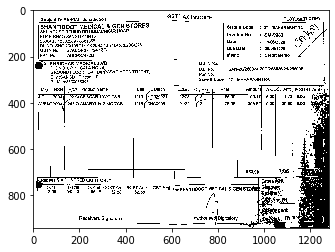

In [20]:
gray = im.convert('L')
bw = gray.point(lambda x: 0 if x<120 else 255, '1')
#bw.show()
plt.imshow(bw)

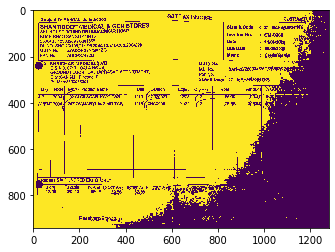

In [22]:
gry = im.convert('L')
grarray = np.asarray(gry)
bw = (grarray > grarray.mean())*255
plt.imshow(bw)

## We need to try some noise reduction technique

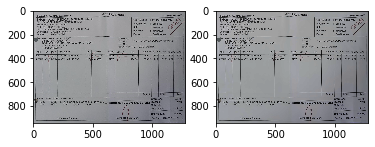

In [23]:
# importing libraries 
import numpy as np 
import cv2 
from matplotlib import pyplot as plt 
  
# Reading image from folder where it is stored 
img = cv2.imread('invoice1.jpg') 
  
# denoising of image saving it into dst image 
dst = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 15) 
  
# Plotting of source and destination image 
plt.subplot(121), plt.imshow(img) 
plt.subplot(122), plt.imshow(dst) 
  
plt.show() 


In [28]:
from matplotlib import cm

im = Image.fromarray(np.uint8(cm.gist_earth(dst)*255))
gray = im.convert('L')
bw = gray.point(lambda x: 0 if x<120 else 255, '1')
#bw.show()
plt.imshow(bw)

TypeError: Cannot handle this data type